In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
import plotly.express as py
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')






In [ ]:
# this library is for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# this library is data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# this library is for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv

# # this library is for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from skimage import io
import matplotlib.pyplot as plt, numpy as np

from tensorflow.keras.utils import image_dataset_from_directory

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:


def calculations(cm_test,classes):     #cm = confusion matrix , Each row in "cm_test" corresponds to the predicted labels for a particular class, and each column corresponds to the true labels for a particular class.
# #"classes" is expected to be a list of class labels for which the performance metrics will be calculated.



  cal_d_test = {}
  for i in range(len(classes)):
    cal_d_test[classes[i]] = []      #Initializes an empty list for the class in "cal_d_test" with the class label as the key.
    TP = cm_test[i][i]                 #True Positives (TP)
    FN = 0                            #False Negatives (FN)
    FP = 0                            #False Positives (FP)
    TN = 0                            #True Negatives (TN)

#Calculates  False Negatives (FN), False Positives (FP), and True Negatives (TN) from the confusion matrix.
    for j in cm_test[i]:
      FN+=j
    FN = FN - TP
  
    for j in range(len(classes)):          ##Calculates  False Positives (FP)
      FP += cm_test[j][i]
    FP = FP - TP

    for x in range(len(classes)):            ##Calculates True Negatives (TN)
      for y in range(len(classes)):
        TN += cm_test[x][y]
    TN = TN - TP - FN - FP


    sensitivity = TP/(TP+FN)                  #Calculates sensitivity (True Positive Rate or Recall), specificity
    specificity = TN/(TN+FP)
    ppv = TP/(TP+FP)                           # positive predictive value (PPV), negative predictive value (NPV)
    npv = TN/(TN+FN)
    f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)     #f1 score
    cal_d_test[classes[i]].append(sensitivity)
    cal_d_test[classes[i]].append(specificity)       #Appends the calculated performance metrics (sensitivity, specificity, PPV, NPV, and F1 score) to the list with the current class label in "cal_d_test" dictionary.
    cal_d_test[classes[i]].append(ppv)
    cal_d_test[classes[i]].append(npv)
    cal_d_test[classes[i]].append(f1)

  return cal_d_test



In [ ]:
#reading csv file
cancer_patient = pd.read_csv("/content/drive/MyDrive/STudy Brac/422/Project/cancer patient data sets.csv")         
cancer_patient.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#import statements for plotting using Matplotlib and Seaborn libraries

#for Matplotlib plots to be displayed directly in the notebook output cells.
%matplotlib inline          

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       #imports the Matplotlib library's pyplot module
import seaborn as sns                 #imports the Seaborn library, it is a statistical data visualization library
plt.style.use("seaborn-whitegrid")  

In [ ]:
cancer_patient.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
cancer_patient.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
#drops patient id column 

cancer_patient.drop(["Patient Id"], axis = 1, inplace= True)

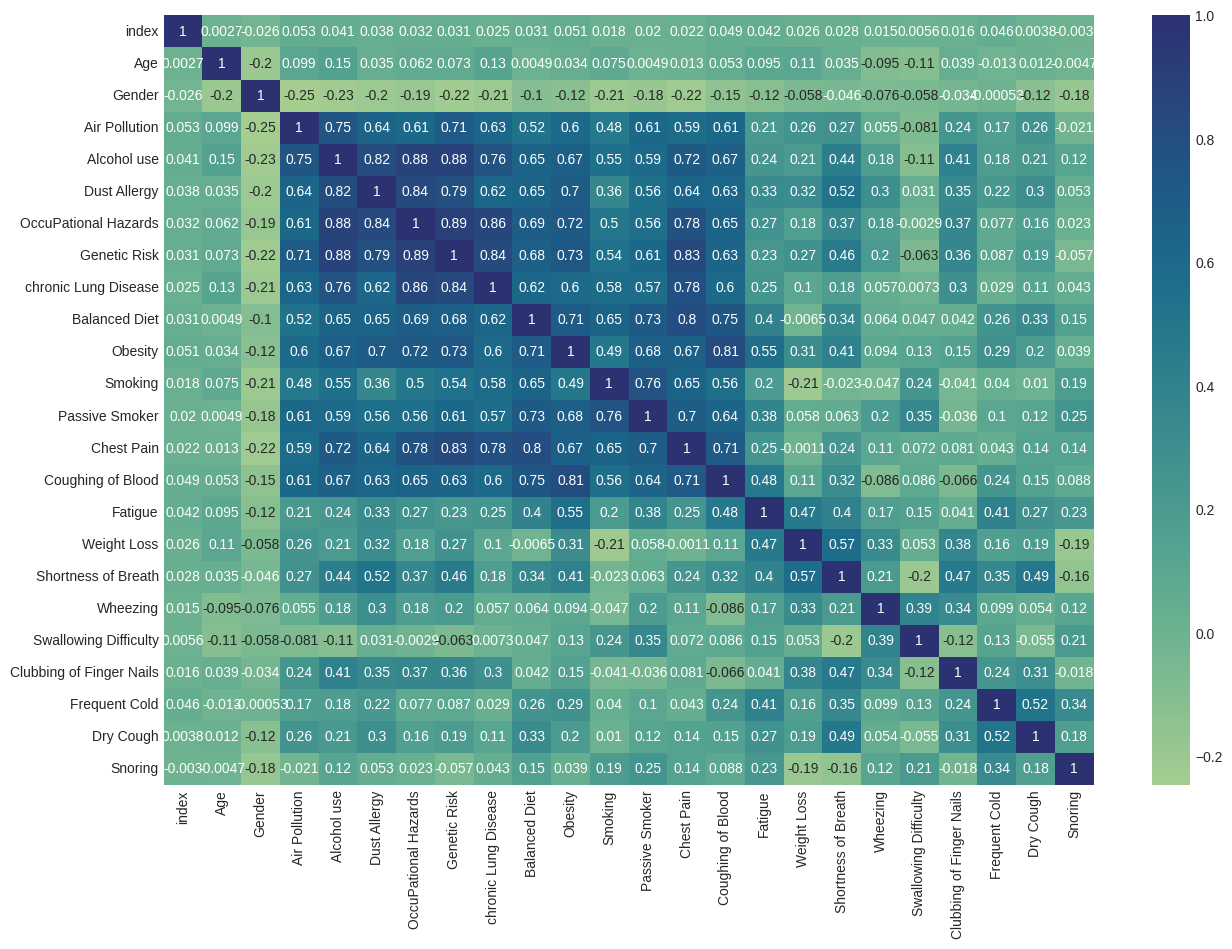

In [ ]:
fig = plt.figure(figsize = (15,10))                 
sns.heatmap(cancer_patient.corr(),cmap="crest",annot=True);          #calculates the correlation matrix for the numerical columns using .corr()
 #Higher positive correlations represents brighter colors, and higher negative correlations represents darker colors. 

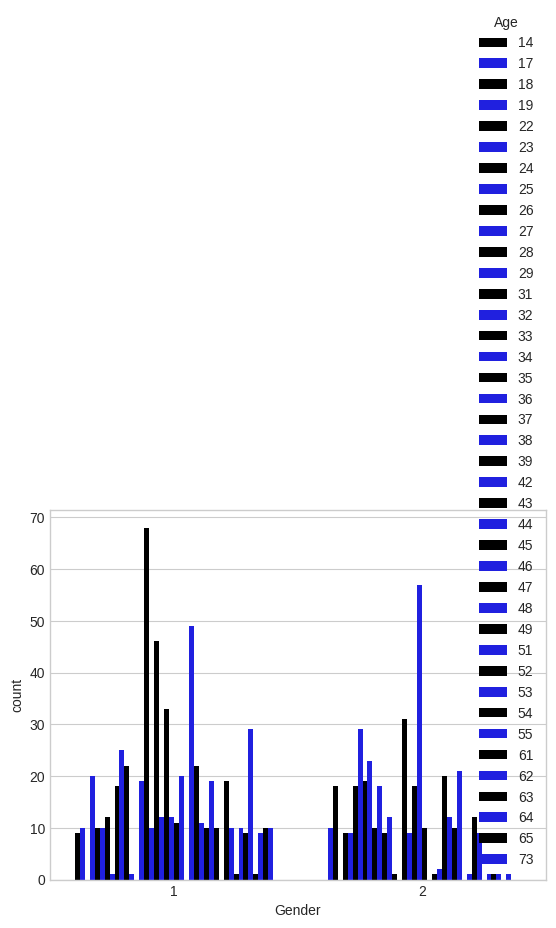

In [ ]:
plot = sns.countplot(data = cancer_patient, x='Gender', hue='Age', palette=['black','blue'])  #creates a countplot of Gender vs age

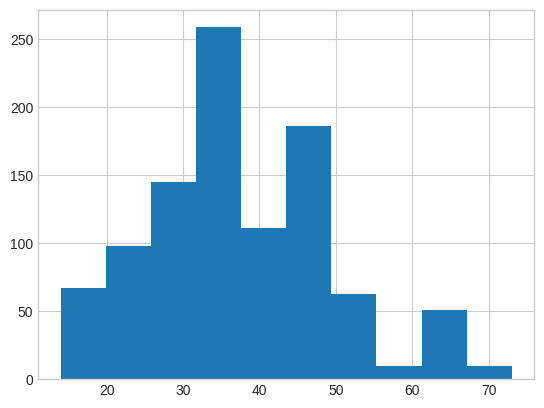

In [ ]:
fig, ax = plt.subplots()    # creates a histogram plot of the "Age" column
hist = ax.hist(x = cancer_patient["Age"]);


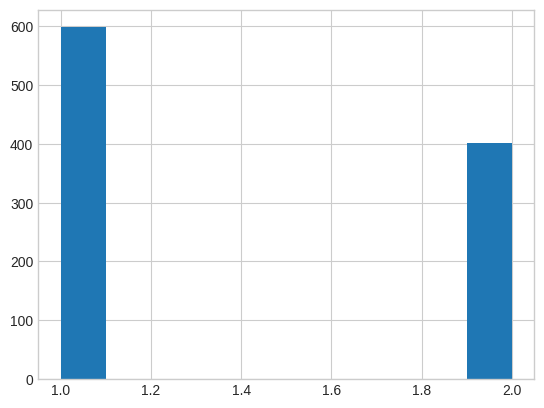

In [ ]:
fig, ax = plt.subplots()       #creates a histogram plot of the "Gender" column
hist = ax.hist(x = cancer_patient["Gender"]);

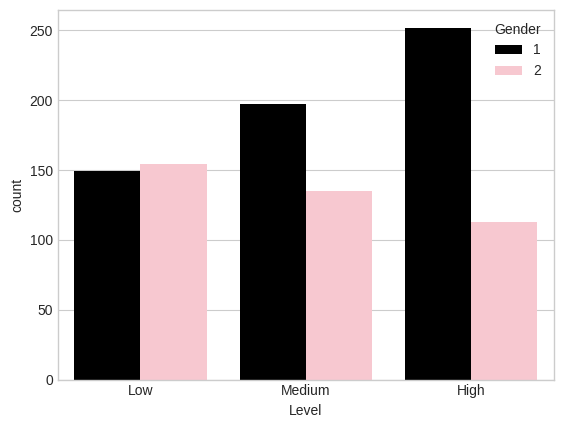

In [ ]:
plot = sns.countplot(data = cancer_patient, x='Level', hue='Gender', palette=['black','pink'])   #counting the plot from gender based on levels of the cancer 

In [ ]:
cancer_patient.columns


Index(['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
cancer_below50 = cancer_patient[ cancer_patient["Age"] < 50]    #calculating the info of patients below 50years old
cancer_below50.head(10)

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,5,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
7,7,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,8,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium
10,10,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High


In [ ]:
cancer_over50 = cancer_patient[cancer_patient["Age"] > 50]      #calculating the info of patients over 50years old
cancer_over50.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,6,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
11,11,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
15,15,73,1,5,6,6,5,6,5,6,...,4,3,6,2,1,2,1,6,2,Medium
21,21,53,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
22,22,62,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


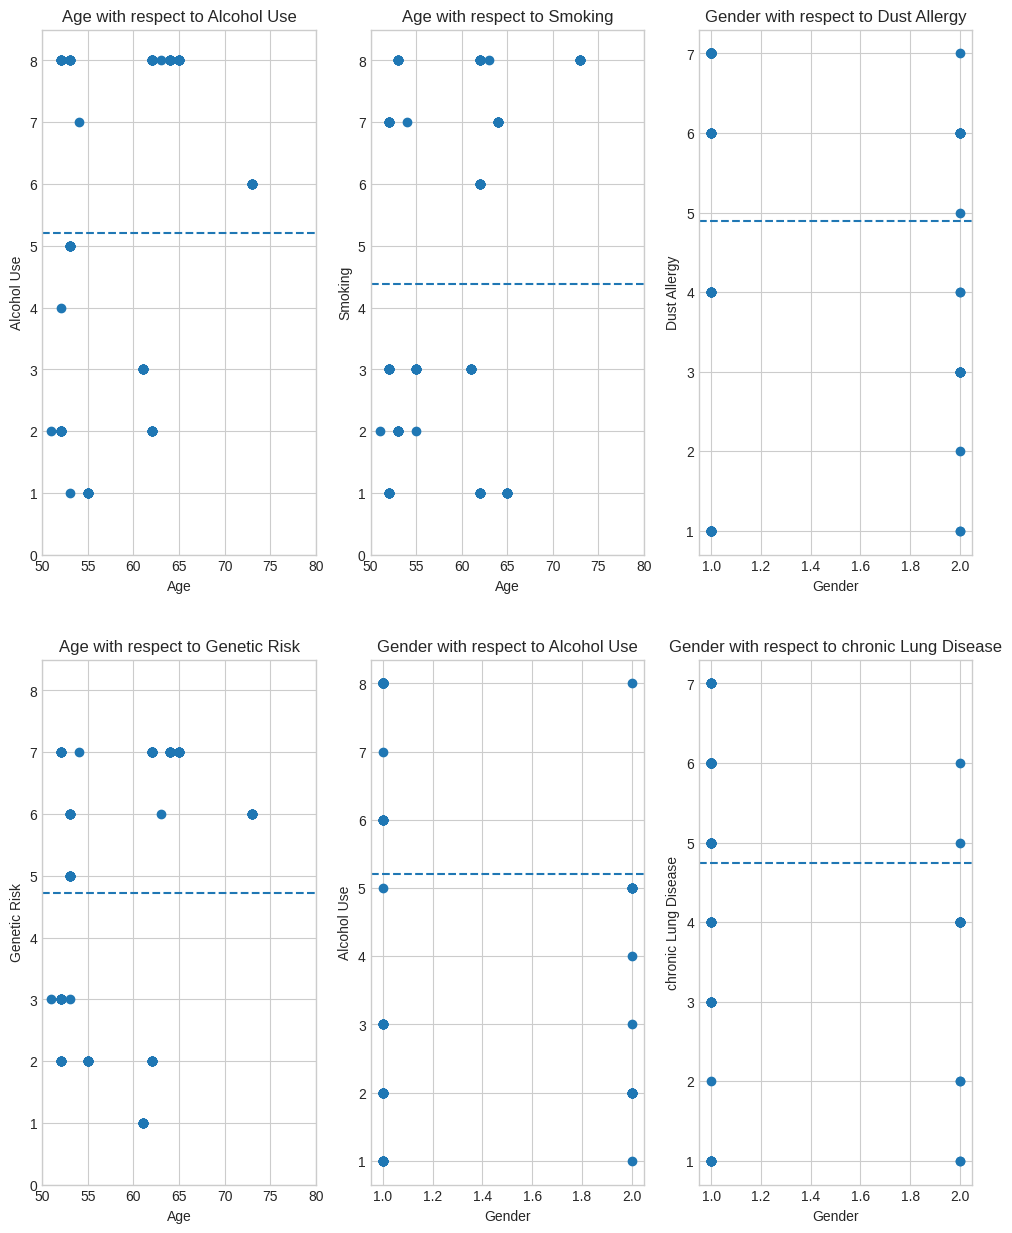

In [ ]:
# Making Subplots  for age over 50 years

#The "Genetic Risk" and "Smoking" columns used for the y-axis of the second and third subplots, 
#The "Gender" and "Alcohol use" columns  are used for the x-axis and y-axis of the fourth subplot,

fig, ((ax1, ax2 ,ax5), (ax3, ax4, ax6)) = plt.subplots(nrows = 2, ncols= 3, figsize=(12, 15))

# Adding Data to the plot


# For Plot ax1
scatter = ax1.scatter(x = cancer_over50["Age"], y = cancer_over50["Alcohol use"], cmap = "winter")
ax1.set(title = "Age with respect to Alcohol Use", 
        xlabel = "Age", 
        ylabel = "Alcohol Use")
ax1.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");
ax1.set_xlim([50, 80])
ax1.set_ylim([0, 8.5])

# For Plot ax2
scatter = ax2.scatter(x = cancer_over50["Age"], y = cancer_over50["Smoking"])
ax2.set(title = "Age with respect to Smoking", xlabel = "Age", ylabel = "Smoking")
ax2.axhline(cancer_over50["Smoking"].mean(),
           linestyle = "--");
ax2.set_xlim([50, 80])
ax2.set_ylim([0, 8.5])

# For Plot ax3
scatter = ax3.scatter(x = cancer_over50["Age"], y = cancer_over50["Genetic Risk"])
ax3.set(title = "Age with respect to Genetic Risk", xlabel = "Age", ylabel = "Genetic Risk")
ax3.axhline(cancer_over50["Genetic Risk"].mean(),
           linestyle = "--");
ax3.set_xlim([50, 80])
ax3.set_ylim([0, 8.5])

# For Plot ax4
scatter = ax4.scatter(x = cancer_over50["Gender"], y = cancer_over50["Alcohol use"])
ax4.set(title = "Gender with respect to Alcohol Use", xlabel = "Gender", ylabel = "Alcohol Use")
ax4.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");

# For Plot ax5
scatter = ax5.scatter(x = cancer_over50["Gender"], y = cancer_over50["Dust Allergy"])
ax5.set(title = "Gender with respect to Dust Allergy", xlabel = "Gender", ylabel = "Dust Allergy")
ax5.axhline(cancer_over50["Dust Allergy"].mean(),
           linestyle = "--");
         

# For Plot ax6
scatter = ax6.scatter(x = cancer_over50["Gender"], y = cancer_over50["chronic Lung Disease"])
ax6.set(title = "Gender with respect to chronic Lung Disease", xlabel = "Gender", ylabel = "chronic Lung Disease")
ax6.axhline(cancer_over50["chronic Lung Disease"].mean(),
           linestyle = "--");
           

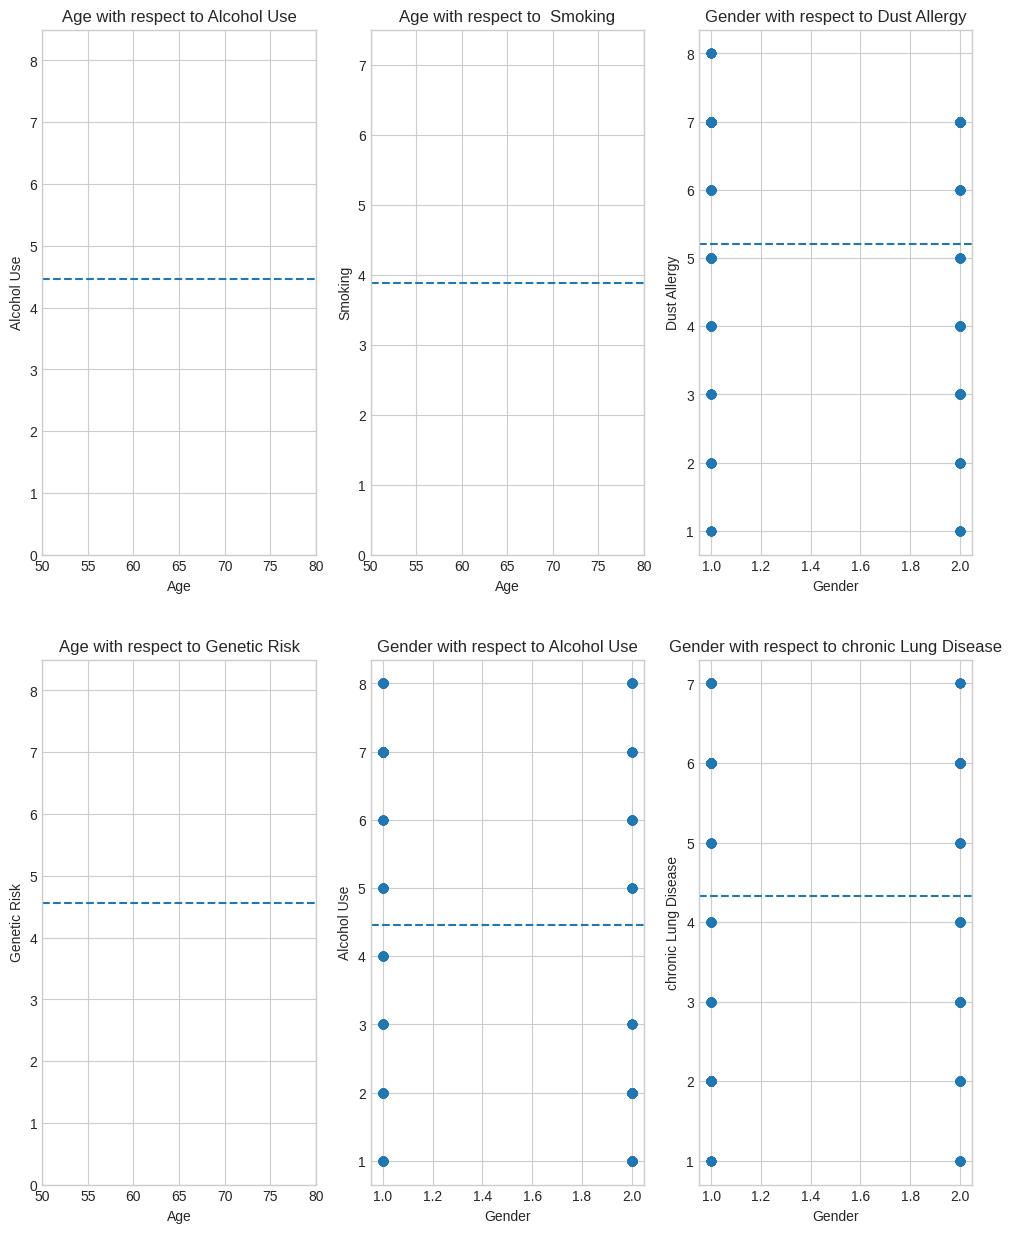

In [ ]:
# Making Subplots  for age below 50 years

#The "Genetic Risk" and "Smoking" columns used for the y-axis of the second and third subplots, 
#The "Gender" and "Alcohol use" columns  are used for the x-axis and y-axis of the fourth subplot,

fig, ((ax1, ax2 ,ax5), (ax3, ax4, ax6)) = plt.subplots(nrows = 2, ncols= 3, figsize=(12, 15))

# Adding Data to the plot


# For Plot ax1
scatter = ax1.scatter(x = cancer_below50["Age"], y = cancer_below50["Alcohol use"], cmap = "winter")
ax1.set(title = "Age with respect to Alcohol Use", 
        xlabel = "Age", 
        ylabel = "Alcohol Use")
ax1.axhline(cancer_below50["Alcohol use"].mean(),
           linestyle = "--");
ax1.set_xlim([50, 80])
ax1.set_ylim([0, 8.5])

# For Plot ax2
scatter = ax2.scatter(x = cancer_below50["Age"], y = cancer_below50["Smoking"])
ax2.set(title = "Age with respect to  Smoking", xlabel = "Age", ylabel = "Smoking")
ax2.axhline(cancer_below50["Smoking"].mean(),
           linestyle = "--");
ax2.set_xlim([50, 80])
ax2.set_ylim([0, 7.5])

# For Plot ax3
scatter = ax3.scatter(x = cancer_below50["Age"], y = cancer_below50["Genetic Risk"])
ax3.set(title = "Age with respect to Genetic Risk", xlabel = "Age", ylabel = "Genetic Risk")
ax3.axhline(cancer_below50["Genetic Risk"].mean(),
           linestyle = "--");
ax3.set_xlim([50, 80])
ax3.set_ylim([0, 8.5])

# For Plot ax4
scatter = ax4.scatter(x = cancer_below50["Gender"], y = cancer_below50["Alcohol use"])
ax4.set(title = "Gender with respect to Alcohol Use", xlabel = "Gender", ylabel = "Alcohol Use")
ax4.axhline(cancer_below50["Alcohol use"].mean(),
           linestyle = "--");

# For Plot ax5
scatter = ax5.scatter(x = cancer_below50["Gender"], y = cancer_below50["Dust Allergy"])
ax5.set(title = "Gender with respect to Dust Allergy", xlabel = "Gender", ylabel = "Dust Allergy")
ax5.axhline(cancer_below50["Dust Allergy"].mean(),
           linestyle = "--");

# For Plot ax6
scatter = ax6.scatter(x = cancer_below50["Gender"], y = cancer_below50["chronic Lung Disease"])
ax6.set(title = "Gender with respect to chronic Lung Disease", xlabel = "Gender", ylabel = "chronic Lung Disease")
ax6.axhline(cancer_below50["chronic Lung Disease"].mean(),
           linestyle = "--");

In [ ]:
cancer_patient.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

<Axes: xlabel='Level', ylabel='Count'>

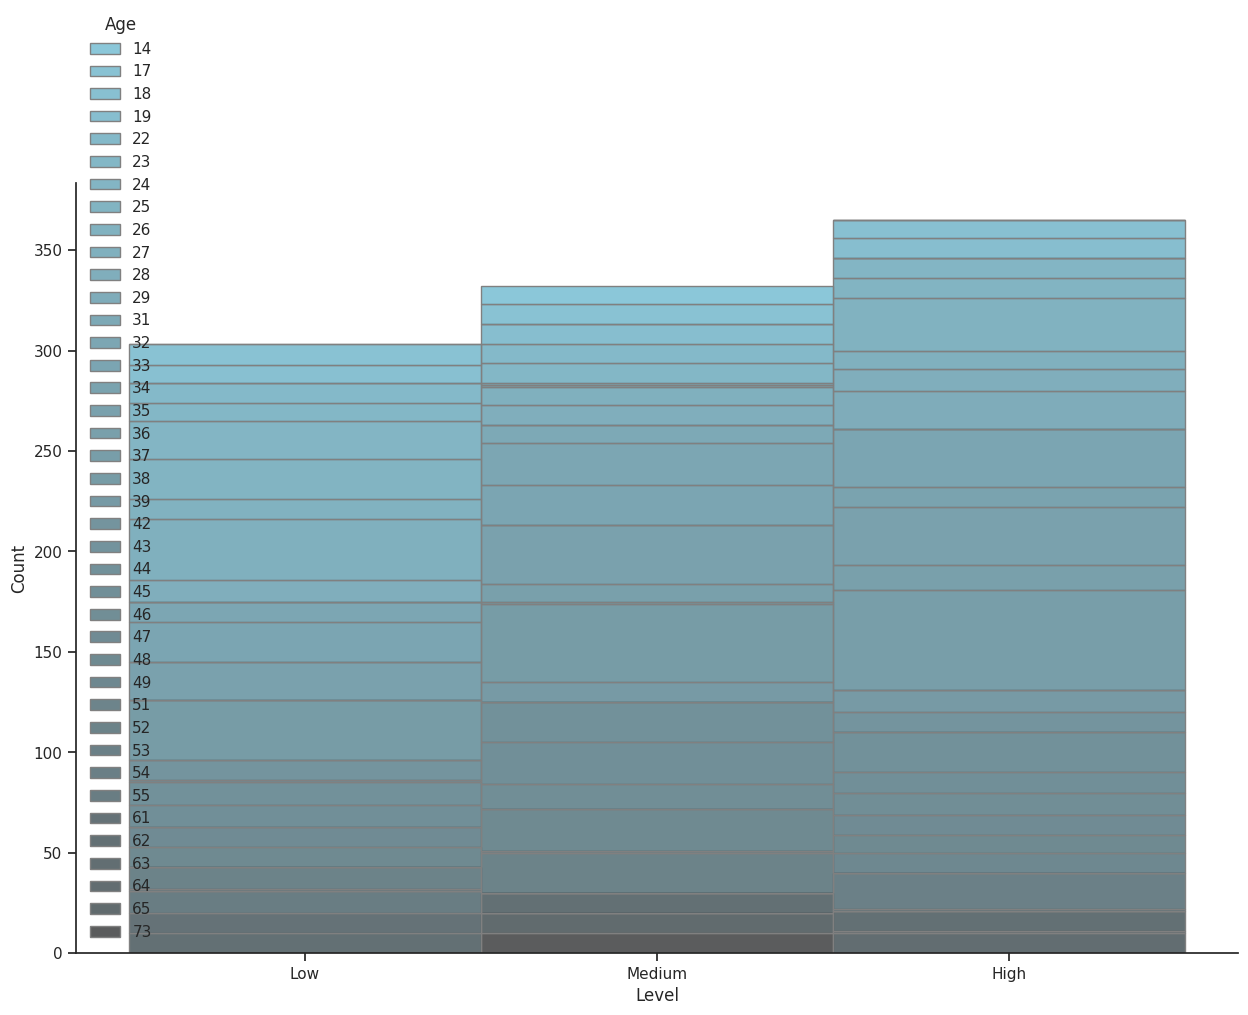

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (15,10))            #This plot is a histogram with stacked bars for different age groups (hue) based on the "Level" column values.
sns.despine(f)
sns.histplot(
    cancer_patient, x= "Level", hue = "Age",
    multiple="stack",palette="dark:c_r",
    edgecolor = "0.5"
) 

In [ ]:
#Feature Encoding
#Labelencodng
#Converting categorical data to numeric data

cancer_patient["Level"].replace(["Low", "Medium", "High"], ["0", "1", "2"], inplace=True)
cancer_patient["Level"] = cancer_patient["Level"].astype(int)
cancer_patient.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


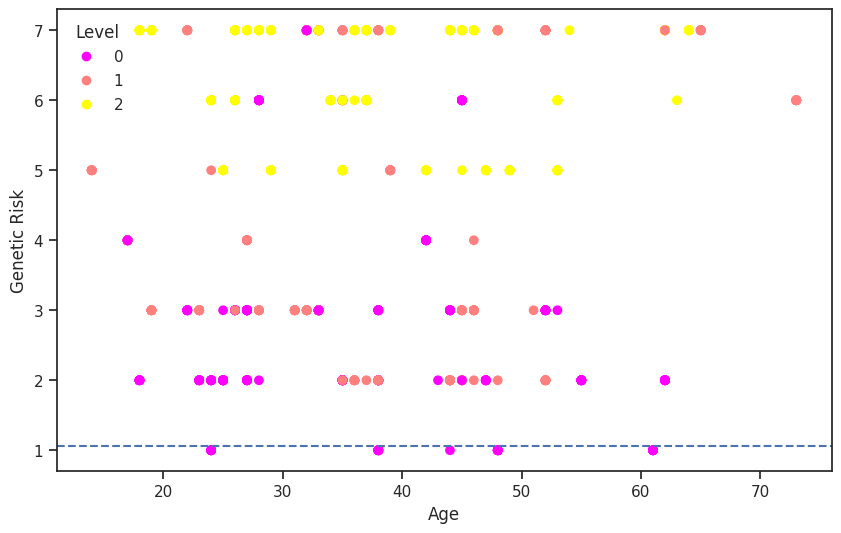

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6));                #for scatter plot

scatter = ax.scatter(x = cancer_patient["Age"],            #"Age" column  x-axis values, , 
                     y = cancer_patient["Genetic Risk"],   #the "Genetic Risk" column as the y-axis 
                     c = cancer_patient["Level"],          #"Level" column as the color values for the scatter points.
                     cmap = "spring")

ax.set(xlabel = "Age", 
       ylabel = "Genetic Risk");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");

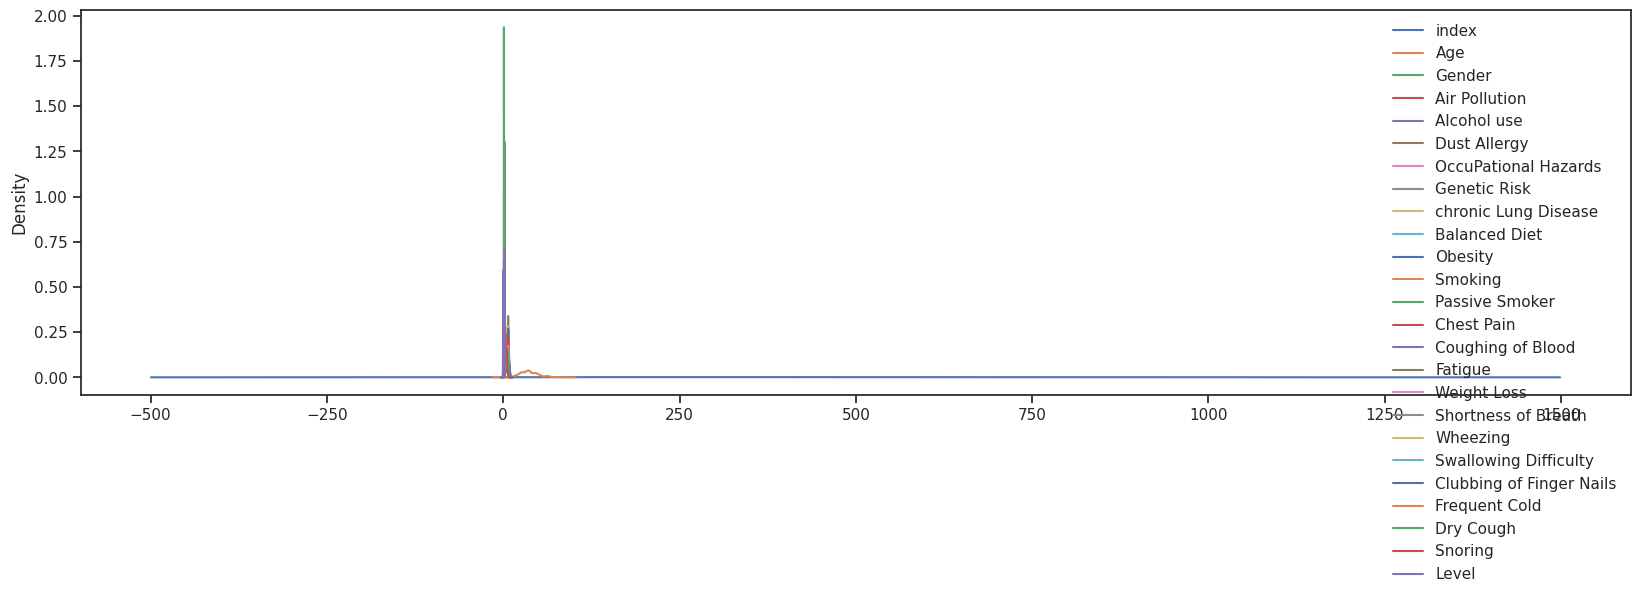

In [ ]:
cancer_patient.plot.kde(figsize = (20,5));   #for plotting kde(kernel density estimate) it process of estimating an unknown probability density function

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>],
       [<Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'OccuPational Hazards'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>,
        <Axes: title={'center': 'Balanced Diet'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'Coughing of Blood'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Weight Loss'}>,
        <Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>],


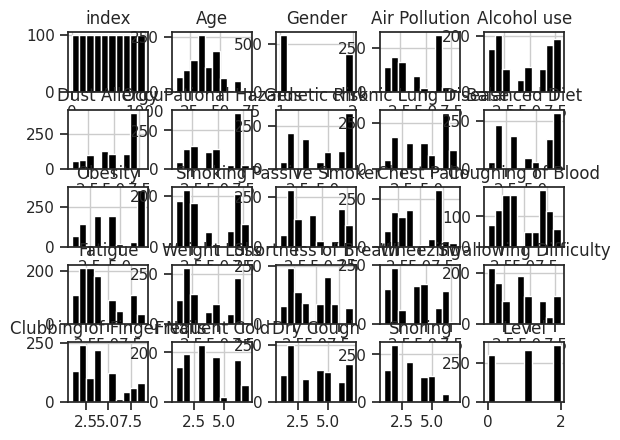

In [ ]:
cancer_patient.hist(color="black")   #plotting histogram of each column

In [ ]:
# Creating NumPy array from the list
np.array([cancer_patient["Gender"][:10]])

gender_list = cancer_patient["Gender"].head(10).tolist()


gender_array = np.array(gender_list)

# Print the NumPy array
print(gender_array)


[1 1 1 1 1 1 2 2 2 1]


In [ ]:
#calculating the number of males and females
male = 0
female = 0
for x in cancer_patient["Gender"]:
    if x == 1:
        male += 1
    elif x == 2:
        female += 1
f"Number of Male: {male}, Number of females: {female}"

'Number of Male: 598, Number of females: 402'

In [ ]:

cancer_patient_male = cancer_patient[cancer_patient["Gender"] == 1]
cancer_patient_male.head()


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [ ]:
cancer_patient_female = cancer_patient[cancer_patient["Gender"] == 2]
cancer_patient_female.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,6,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
7,7,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,0
8,8,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,1
11,11,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
12,12,39,2,4,5,6,6,5,4,6,...,5,3,2,4,3,1,7,5,6,1


(array([[<Axes: title={'center': 'index'}>,
         <Axes: title={'center': 'Age'}>,
         <Axes: title={'center': 'Gender'}>,
         <Axes: title={'center': 'Air Pollution'}>,
         <Axes: title={'center': 'Alcohol use'}>],
        [<Axes: title={'center': 'Dust Allergy'}>,
         <Axes: title={'center': 'OccuPational Hazards'}>,
         <Axes: title={'center': 'Genetic Risk'}>,
         <Axes: title={'center': 'chronic Lung Disease'}>,
         <Axes: title={'center': 'Balanced Diet'}>],
        [<Axes: title={'center': 'Obesity'}>,
         <Axes: title={'center': 'Smoking'}>,
         <Axes: title={'center': 'Passive Smoker'}>,
         <Axes: title={'center': 'Chest Pain'}>,
         <Axes: title={'center': 'Coughing of Blood'}>],
        [<Axes: title={'center': 'Fatigue'}>,
         <Axes: title={'center': 'Weight Loss'}>,
         <Axes: title={'center': 'Shortness of Breath'}>,
         <Axes: title={'center': 'Wheezing'}>,
         <Axes: title={'center': 'Swallow

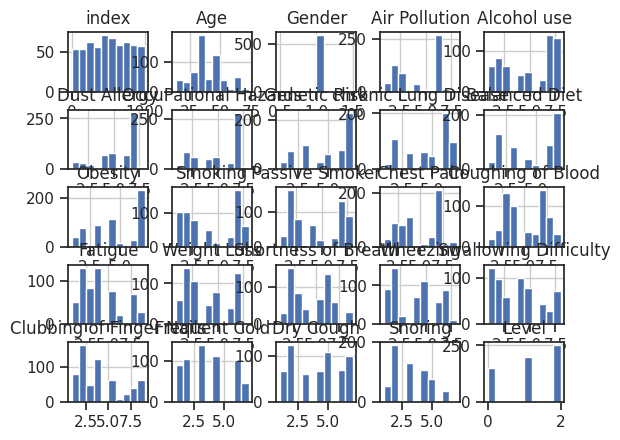

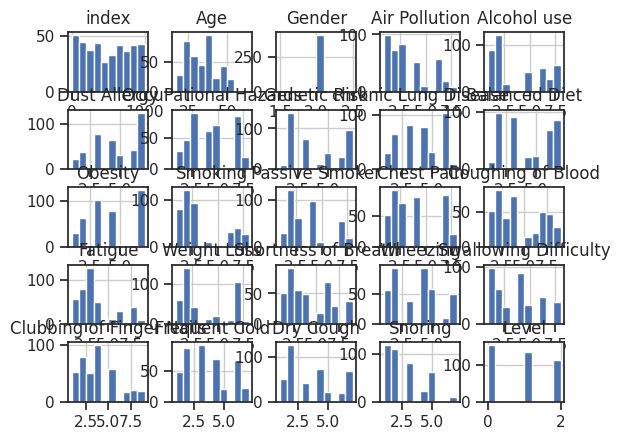

In [ ]:
#making histogram of male and female cancer patients
cancer_patient_male.hist(),cancer_patient_female.hist()

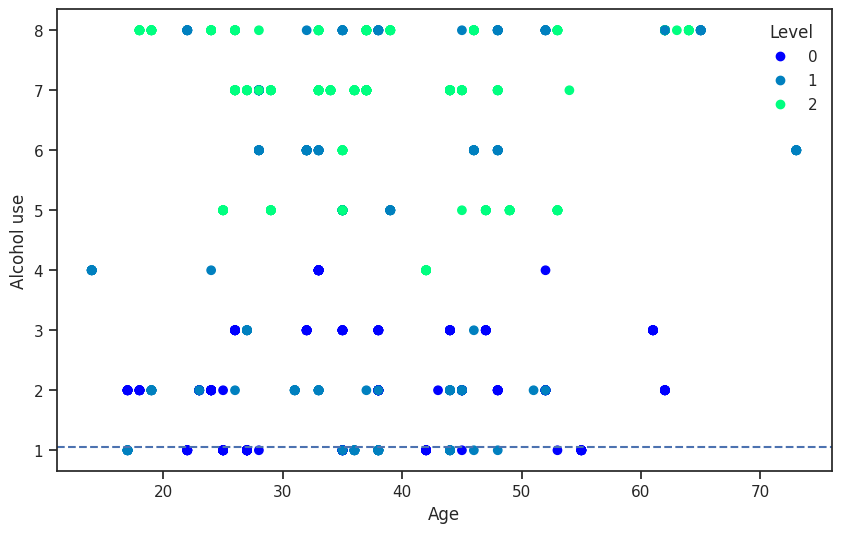

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))                   #it used to create a scatter plot with "Age" column as the x-axis 
scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Alcohol use"],     # "Alcohol use" column as the y-axis,
                     c = cancer_patient["Level"],           #"Level" column as the color.
                     cmap = "winter")

ax.set(xlabel = "Age", 
       ylabel = "Alcohol use");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");


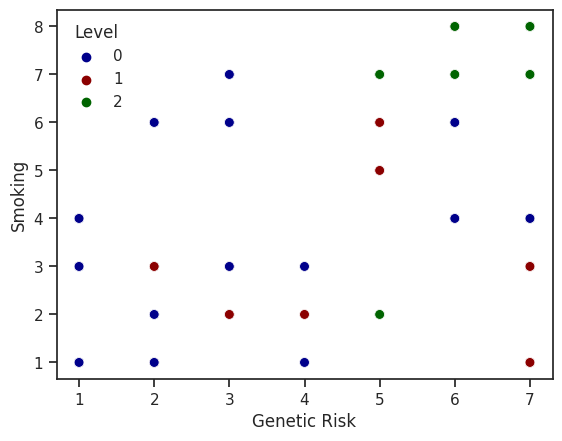

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Genetic Risk',
                     y='Smoking', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot    
                                

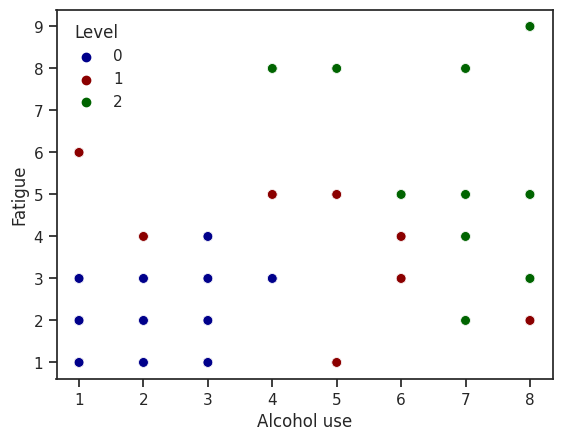

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Alcohol use',
                     y='Fatigue', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot

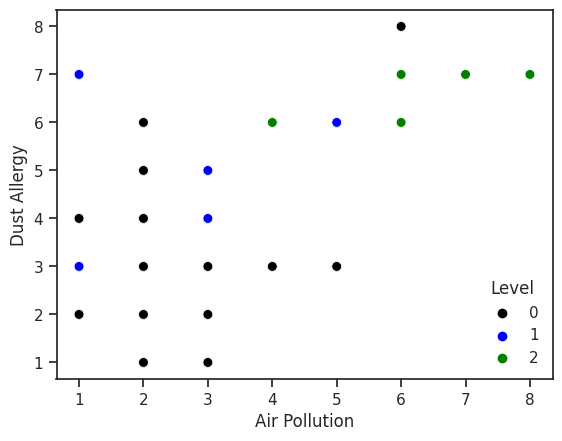

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Air Pollution',
                     y='Dust Allergy', 
                     hue='Level', 
                     palette=['black','blue','green'], 
                     s=50, 
                     marker='o')#Count plot

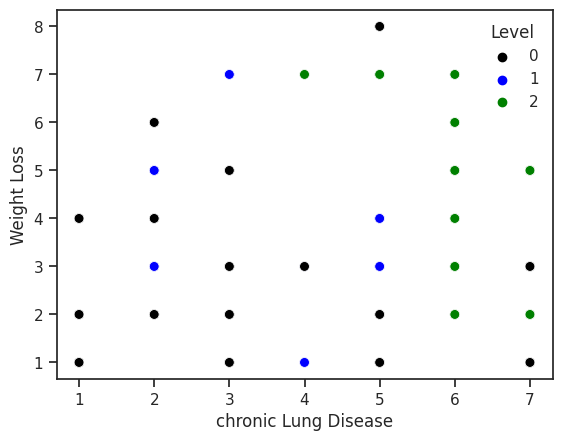

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='chronic Lung Disease',
                     y='Weight Loss', 
                     hue='Level', 
                     palette=['black','blue','green'], 
                     s=50, 
                     marker='o')#Count plot

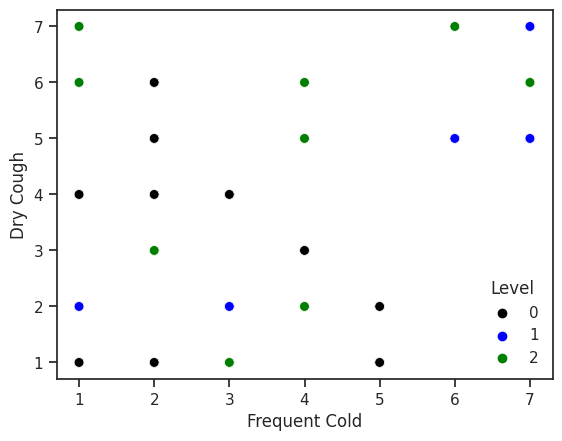

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Frequent Cold',
                     y='Dry Cough', 
                     hue='Level', 
                     palette=['black','blue','green'], 
                     s=50, 
                     marker='o')#Count plot

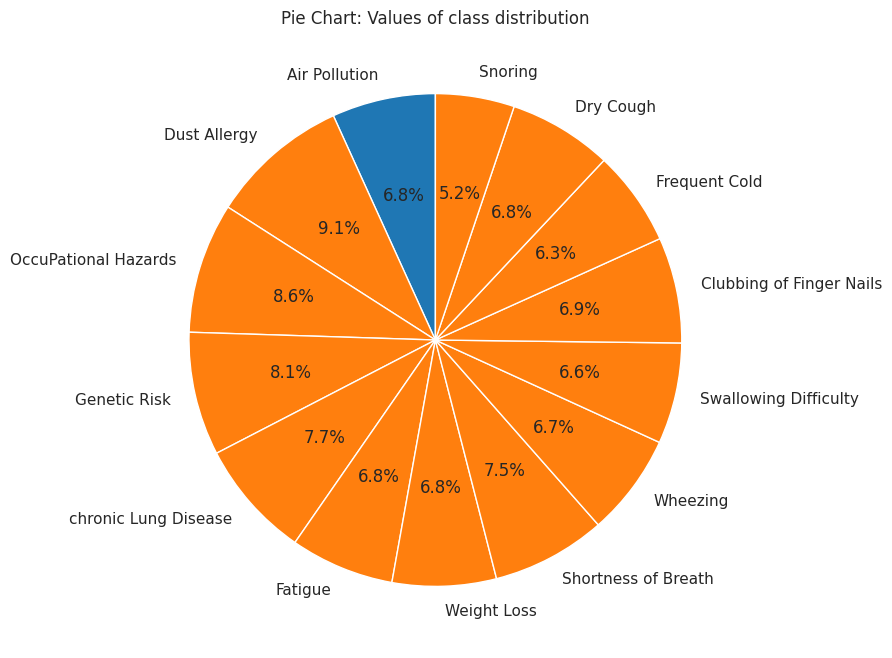

In [ ]:

#This pie chart displays the distribution of values in each of symtopms as a percentage of the whole dataset.

# Extract two columns from the dataset
# column1 = cancer_patient["Age"]
column2 = cancer_patient["Air Pollution"]
column3 = cancer_patient["Dust Allergy"]
column4 = cancer_patient["OccuPational Hazards"]
column5 = cancer_patient["Genetic Risk"]
column6 = cancer_patient["chronic Lung Disease"]
column7 = cancer_patient["Fatigue"]
column8 = cancer_patient["Weight Loss"]
column9 = cancer_patient["Shortness of Breath"]
column10 = cancer_patient["Wheezing"]
column11= cancer_patient["Swallowing Difficulty"]
column12 = cancer_patient["Clubbing of Finger Nails"]
column13 = cancer_patient["Frequent Cold"]
column14 = cancer_patient["Dry Cough"]
column15 = cancer_patient["Snoring"]


# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))  # Set figure size
labels = ["Air Pollution",  "Dust Allergy", "OccuPational Hazards", "Genetic Risk", "chronic Lung Disease",
          "Fatigue", "Weight Loss","Shortness of Breath", "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold", "Dry Cough", "Snoring"]  # Labels for the pie chart
values = [ column2.sum(), column3.sum(), column4.sum(), column5.sum(), column6.sum(), 
          column7.sum(), column8.sum(), column9.sum(), column10.sum(), column11.sum(), column12.sum(), column13.sum(), column14.sum(), column15.sum()]  # Values for the pie chart
colors = ["#1f77b4", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e", "#ff7f0e"]  # Colors for the pie chart
ax.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

# Set title for the pie chart
ax.set_title("Pie Chart: Values of class distribution")

# Show the plot
plt.show()

**Models**

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)
y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))   #y_true = represents the true values of the target variable , y_pred = represents the predicted values of the target variable

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        58
      Medium       1.00      1.00      1.00        67
        High       1.00      1.00      1.00        75

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



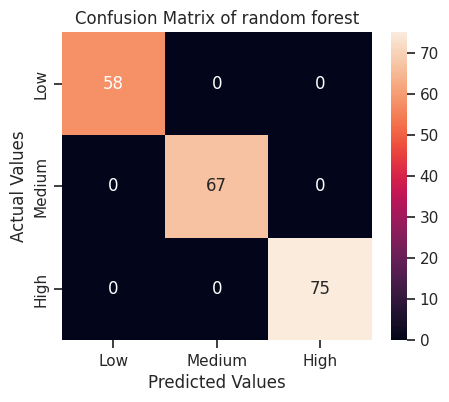

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of random forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

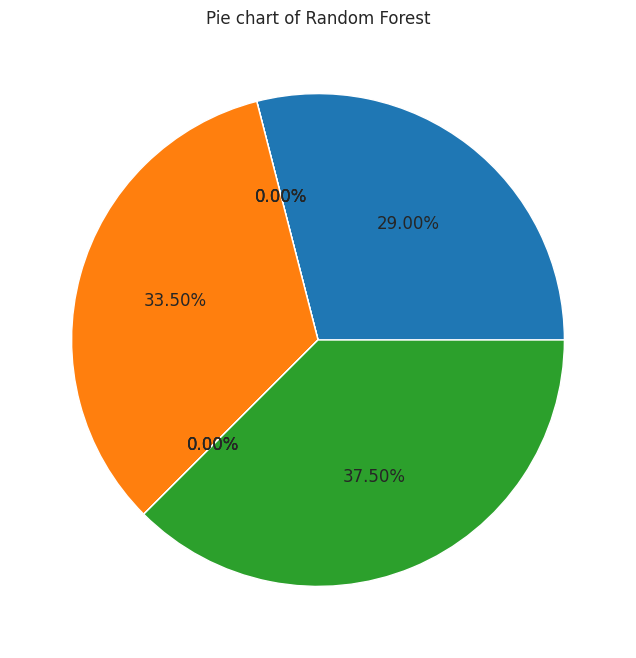

In [ ]:
import matplotlib.pyplot as plt

# Define class labels
cls = ["Low", "Medium", "High"]

# Create confusion matrix
cm_model = confusion_matrix(y_test, y_true)

# Create a pie chart for the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cm_model.ravel(), autopct='%1.2f%%',  colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

ax.set_title("Pie chart of Random Forest")
plt.show()



Knn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred = knn .predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.78


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

         Low       0.76      0.87      0.81        61
      Medium       0.73      0.68      0.71        69
        High       0.85      0.80      0.82        70

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



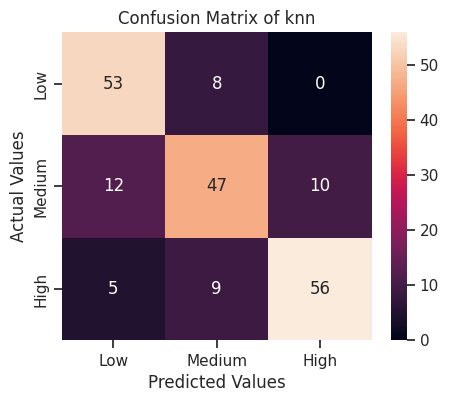

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_pred)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of knn')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

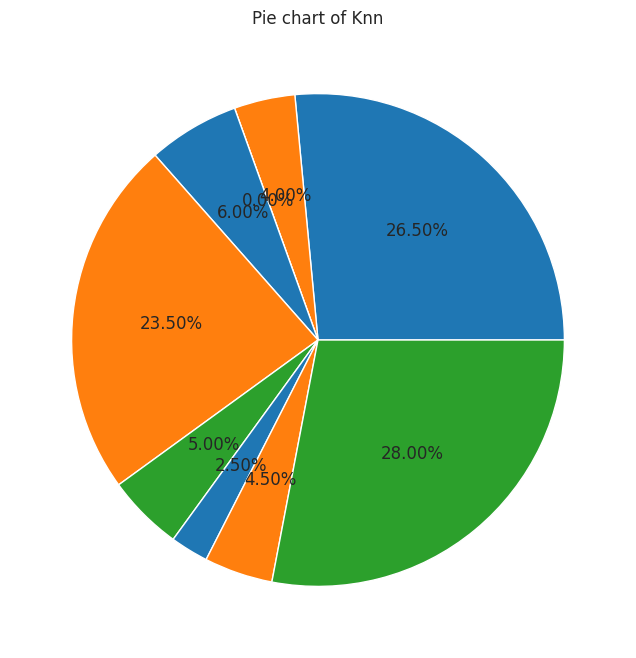

In [ ]:
import matplotlib.pyplot as plt

# Define class labels
cls = ["Low", "Medium", "High"]

# Create confusion matrix
cm_model = confusion_matrix(y_test, y_pred)

# Create a pie chart for the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cm_model.ravel(), autopct='%1.2f%%',  colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

ax.set_title("Pie chart of Knn")
plt.show()


Linear Classification

In [ ]:
x=cancer_patient[["Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","Balanced Diet","Coughing of Blood",
    "Obesity","Smoking","Passive Smoker","Fatigue","Clubbing of Finger Nails","Dry Cough"
       ,"Snoring","Age","Wheezing","Swallowing Difficulty"]]
y=cancer_patient[['Level']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(random_state=0)   #linear classifier
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.825


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       1.00      0.57      0.72        67
      Medium       0.72      0.90      0.80        58
        High       0.83      1.00      0.91        75

    accuracy                           0.82       200
   macro avg       0.85      0.82      0.81       200
weighted avg       0.86      0.82      0.82       200



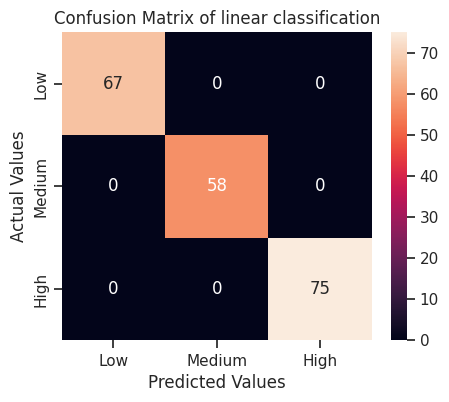

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of linear classification')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

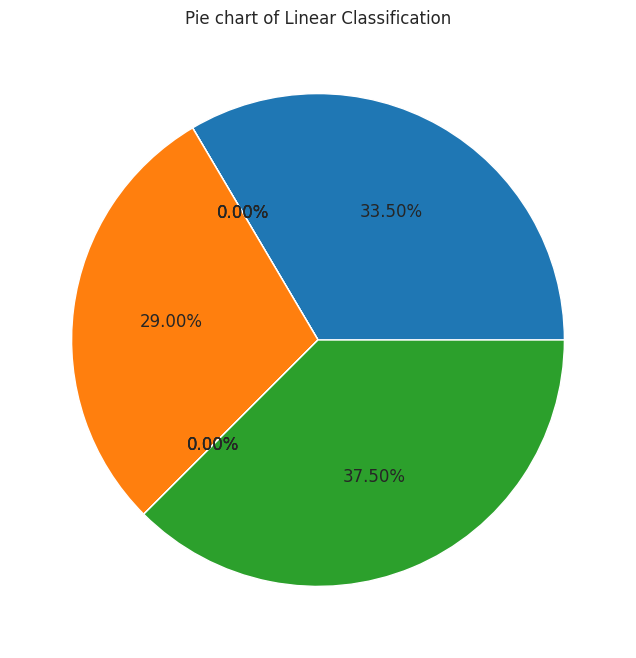

In [ ]:
import matplotlib.pyplot as plt

# Define class labels
cls = ["Low", "Medium", "High"]

# Create confusion matrix
cm_model = confusion_matrix(y_test, y_true)

# Create a pie chart for the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cm_model.ravel(), autopct='%1.2f%%',  colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

ax.set_title("Pie chart of Linear Classification")
plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 42)
sv = svm.SVC()
sv.fit(X_train, y_train)
acc_sv = sv.score(X_test, y_test)
y_pred = sv .predict(X_test)
print(acc_sv)

0.435


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       0.36      0.29      0.32        55
      Medium       0.43      0.33      0.38        63
        High       0.47      0.61      0.53        82

    accuracy                           0.43       200
   macro avg       0.42      0.41      0.41       200
weighted avg       0.43      0.43      0.42       200



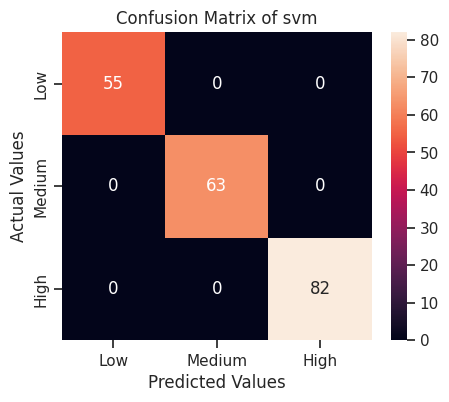

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of svm')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

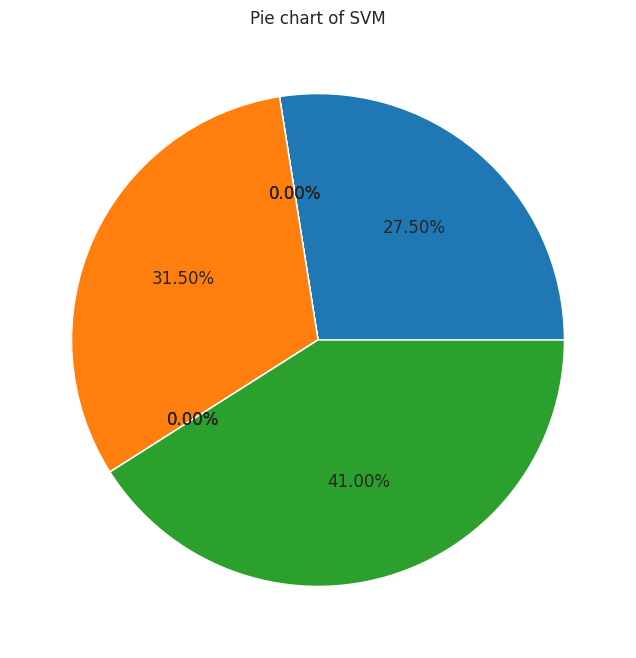

In [ ]:
import matplotlib.pyplot as plt

# Define class labels
cls = ["Low", "Medium", "High"]

# Create confusion matrix
cm_model = confusion_matrix(y_test, y_true)

# Create a pie chart for the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cm_model.ravel(), autopct='%1.2f%%',  colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

ax.set_title("Pie chart of SVM")
plt.show()

RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 40)


# Create Ridge Regression model
alpha = 0.5  # Regularization strength
ridge = Ridge(alpha=alpha)

# Train the Ridge Regression model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Calculate R^2 score as accuracy metric
accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.9355772957735138


R^2 Score (Accuracy): 0.9355772957735138
Mean Squared Error (MSE): 0.0442906091557093
Root Mean Squared Error (RMSE): 0.21045334199225563
Mean Absolute Error (MAE): 0.15393500394695564


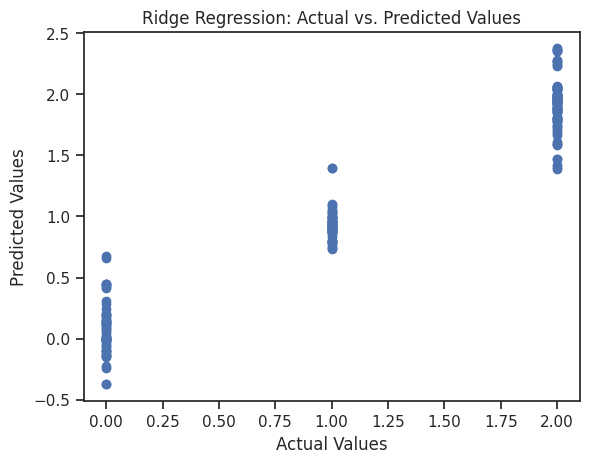

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate other performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("R^2 Score (Accuracy):", accuracy)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted Values")
plt.show()

GaussianNaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.895


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

         Low       1.00      0.85      0.92        55
      Medium       0.85      0.84      0.85        63
        High       0.87      0.96      0.91        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



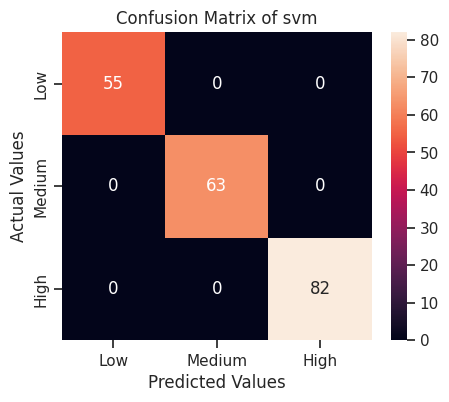

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of svm')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()